#### Solution Exercise_5

#### Exercise 1 : 
#### Part1: PCA (Principal component analysis)

In [41]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('customers.csv')

In [42]:
dataset.head()

,ID,Gender,Age,Income (k$),Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
X = dataset.iloc[:, :]

#Encode categorical data (Gender column)
labelencoder_X = LabelEncoder()
X.iloc[:, 1] = labelencoder_X.fit_transform(X.iloc[:, 1])
X.head()

,ID,Gender,Age,Income (k$),Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [44]:
# Standardizing the feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)



In [45]:
# Apply PCA on data set
from sklearn.decomposition import PCA
pca = PCA(random_state=1)

#pca = PCA(random_state=1,n_components=3)
principalComponents = pca.fit_transform(X)
explained_var_values = pca.explained_variance_
explained_var_ratio = pca.explained_variance_ratio_

print(explained_var_values)
print(explained_var_ratio)

[ 1.99507004  1.35420929  0.97725931  0.67613098  0.02245601]
[ 0.39701894  0.26948765  0.1944746   0.13455007  0.00446875]


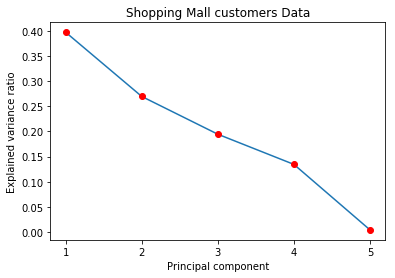

In [46]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the principal component against the Explained variance ratio
ax.plot( range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'ro')
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
ax.set_title('Shopping Mall customers Data')
ax.set_xlabel('Principal component')
ax.set_ylabel('Explained variance ratio')
plt.savefig('Explained variance.png', dpi=200)
plt.show()

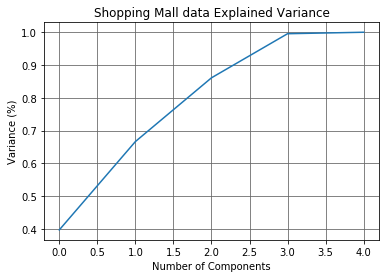

Exact values:
num of components: 1: 39.70%, cumulated :  39.70%
num of components: 2: 26.95%, cumulated :  66.65%
num of components: 3: 19.45%, cumulated :  86.10%
num of components: 4: 13.46%, cumulated :  99.55%
num of components: 5:  0.45%, cumulated : 100.00%


In [47]:
# visualization
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Shopping Mall data Explained Variance')
# Show the grid lines as dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

# print values from plot:
print("Exact values:")
for i in range(0, len(cum_explained_variance)):
    print("num of components: %i: %5.2f%%, cumulated : %6.2f%%" % (i+1, pca.explained_variance_ratio_[i]*100, cum_explained_variance[i]*100))



Percentage of variance explained by top two Prinicpal components  are 39.70 % and 26.95 %

Based on results of above implemented PCA, we observe that three or four components would be required to explain most of the variance in dataset through which we can preserve something around 99% of the total variance of the data. However we will not use 100% of our variance, because it denotes all components, and we want only the principal ones.

### Part 2: K -means Clustering

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# Importing the dataset
dataset = pd.read_csv('customers.csv')

dataset.head()

,ID,Gender,Age,Income (k$),Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
#Extract two features income and score
X = dataset.iloc[:, [3, 4]].values



In [50]:
# Fitting K-Means to the dataset with random choice of clusters set 
kmeans = KMeans(n_clusters = 9, init = 'k-means++', random_state = 42)

#with sklearn default setting  number of clusters
#kmeans = KMeans(init = 'k-means++', random_state = 42)

y_kmeans = kmeans.fit_predict(X)

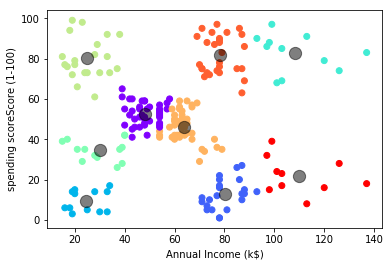

In [51]:

# Visualising the clusters
plt.figure()
plt.scatter(X[:, 0],X[:, 1], c=y_kmeans, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.5);
plt.xlabel('Annual Income (k$)')
plt.ylabel('spending scoreScore (1-100)')
plt.show()

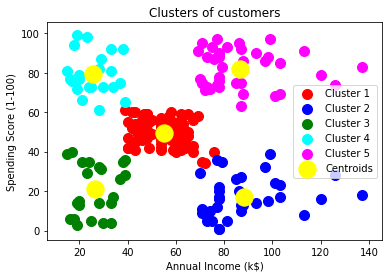

In [52]:
# Fitting K-Means to the dataset with number of clusters set as 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

#without setting predefined number of clusters
#kmeans = KMeans(init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Basic Interpretation of the clusters

Cluster 4 (left top in plot): low income and high spending score

Cluster 5(right top in plot): high income and high spending score

Cluster 1 (central in plot): avearage income and average spending score

Cluster 3 (bottem left in plot): low income and low spending score

Cluster 2 (bottem right in plot): high income low spending score

#### Part 3
#### Hierarchical Clustering

In [53]:
# Importing the dataset
dataset = pd.read_csv('customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [54]:
# Fitting Agglomerative Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering( affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)


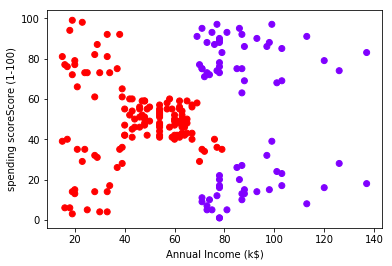

In [55]:

## Visualising the clusters
plt.figure()
plt.scatter(X[:, 0],X[:, 1], c=y_hc, cmap='rainbow')

plt.xlabel('Annual Income (k$)')
plt.ylabel('spending scoreScore (1-100)')
plt.show()

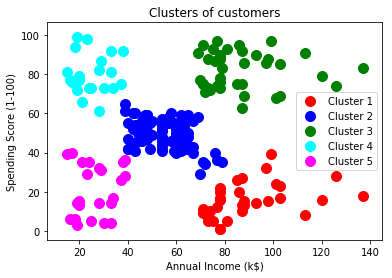

In [56]:

# Test hierarchical clustering With number of cluster =5
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

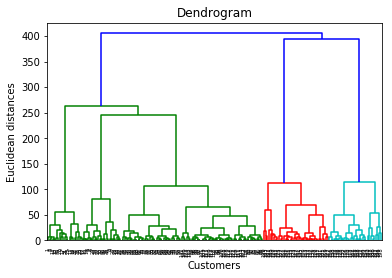

In [57]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

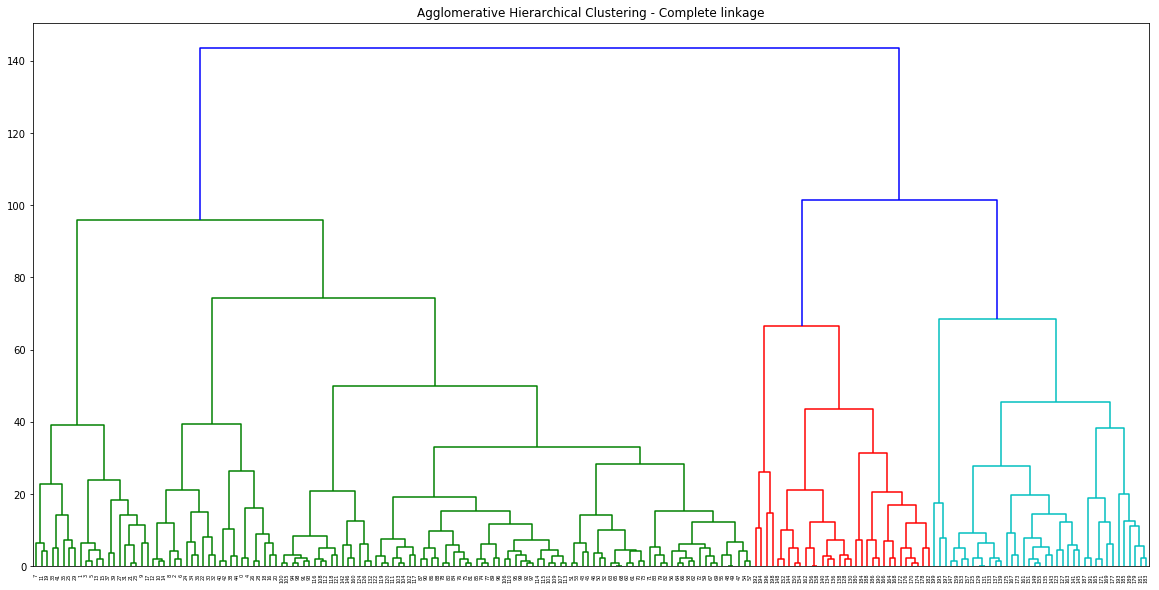

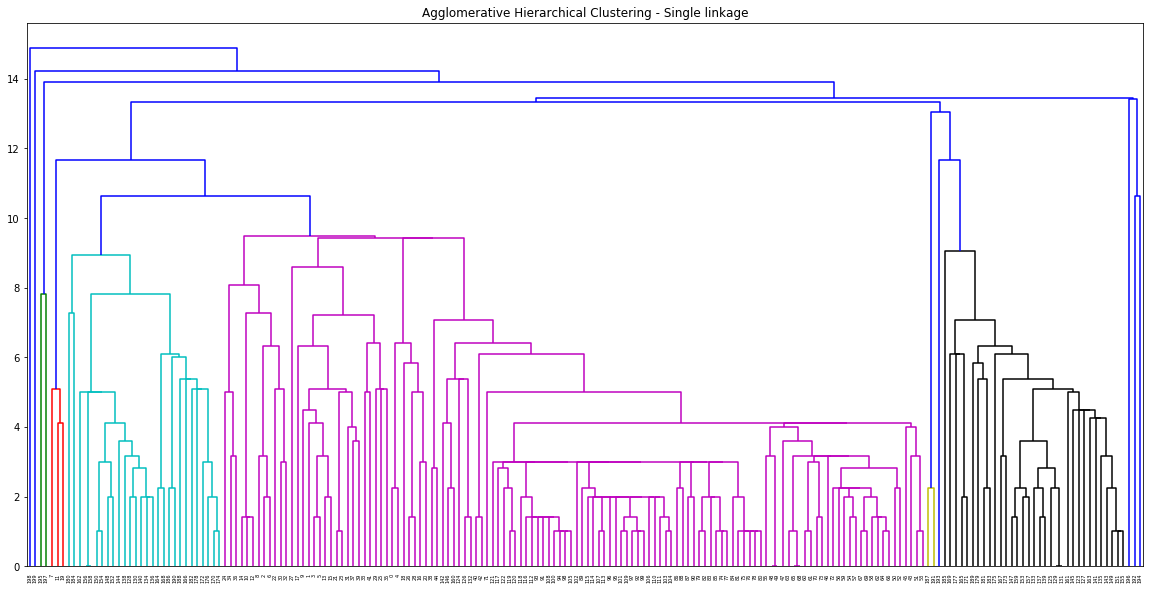

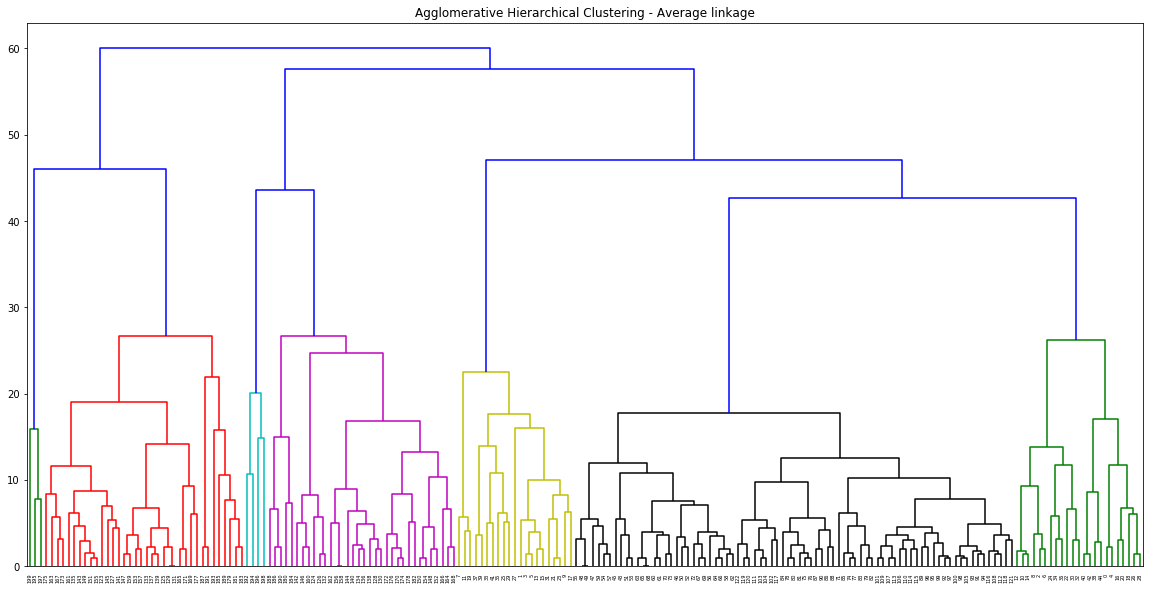

In [58]:
## Plot Dendrogram for different linkage strategies: Complete, Single, Average

plt.figure(figsize=(20, 10)) 
plt.title('Agglomerative Hierarchical Clustering - Complete linkage')
dend_complete = sch.dendrogram(sch.linkage(X, method='complete'))
plt.show()

plt.figure(figsize=(20, 10)) 
plt.title('Agglomerative Hierarchical Clustering - Single linkage')
dend_single = sch.dendrogram(sch.linkage(X, method='single'))
plt.show()

plt.figure(figsize=(20, 10)) 
plt.title('Agglomerative Hierarchical Clustering - Average linkage')
dend_avg = sch.dendrogram(sch.linkage(X, method='average'))
plt.show()


#### part 4

Based on implementation, results would vary.

Both K means and Hierarchical Clustering methods find hidden unknown patterns in data set without pre-existing labels.


In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering

K Means clustering requires prior knowledge of K i.e. no. of clusters you want to divide your data into. with default setting  (or random choice ), we see that 9 clusters are formed. But after predefining  K= 5 as in question ,5 clusters are formed  with meaningful interpretations.

Through elbow method , we can find optimum number of clusters and decide to set number of clusters.

In hierachical clustering ,no need to  predefine number of clusters. ( with default setting we could see 2 clusters get generated)

But, you can stop at whatever number of clusters you find appropriate in hierarchical clustering by interpreting the dendrogram